# Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('DatasetMonthly3.csv')
train = dataset.iloc[0:123,:] 
test = dataset.iloc[123:-1,:] 

X_train = np.array(train.iloc[:, 0]).reshape(-1, 1)
y_train = np.array(train.iloc[:, 1]).reshape(-1, 1)
X_test = np.array(test.iloc[:, 0]).reshape(-1, 1)
y_test = np.array(test.iloc[:, 1]).reshape(-1, 1)


## Training the Linear Regression model on the Training set

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the Training set

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [6]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[40439956.01 39591854.  ]
 [40605707.96 39100499.  ]
 [40778899.46 37726472.88]
 [40948379.9  37866809.  ]
 [41125472.07 38550694.  ]
 [41304583.35 38894976.  ]
 [41479862.71 40100440.59]
 [41663019.7  40950726.39]
 [41842260.98 39838307.03]
 [42029560.32 40738291.74]
 [42219001.93 40699842.98]
 [42391972.7  39735951.44]
 [42585560.96 39573744.46]
 [42775013.43 38179073.88]
 [42972984.86 37240557.1 ]
 [43166726.45 36792495.92]
 [43369178.98 37836828.47]
 [43573946.44 37818309.05]
 [43774336.58 39252000.52]
 [43983733.55 39201262.49]
 [44188651.66 38645417.47]
 [44402777.02 38376549.11]
 [44619343.33 38693924.07]
 [44824170.19 39427420.71]
 [45045533.93 40248709.4 ]
 [45262152.67 38626336.87]
 [45488492.78 37527874.44]
 [45709975.78 37232054.08]
 [45941392.44 37668458.76]
 [46175427.48 38319671.43]
 [46404430.57 38175488.11]
 [46643693.95 38728525.32]
 [46877805.59 38754623.81]
 [47122398.41 39342315.85]
 [47369738.49 38813276.99]
 [47595525.61 40518867.04]
 [47848166.96 39408438.43]
 

## Evaluating the Model Performance

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
print(r2_score(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

-60.451289474711395
8782269.837715602


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

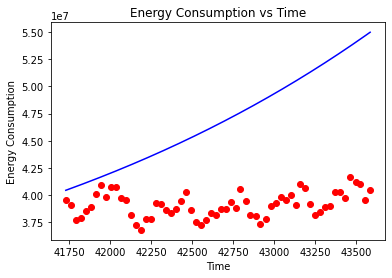

In [8]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()